# Internship Number - DS2312

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv',names=['ID','Gender','Married','Dependents','Education','Self_Employed','Income','CoapplicantIncome','Loan_Amount','Loan_Amount Term','Credit History','Prop_area','Status'])

In [3]:
df

,ID,Gender,Married,Dependents,Education,Self_Employed,Income,CoapplicantIncome,Loan_Amount,Loan_Amount Term,Credit History,Prop_area,Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   Income             614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount Term   600 non-null    float64
 10  Credit History     564 non-null    float64
 11  Prop_area          614 non-null    object 
 12  Status             614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,Income,CoapplicantIncome,Loan_Amount,Loan_Amount Term,Credit History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:xlabel='Status', ylabel='count'>

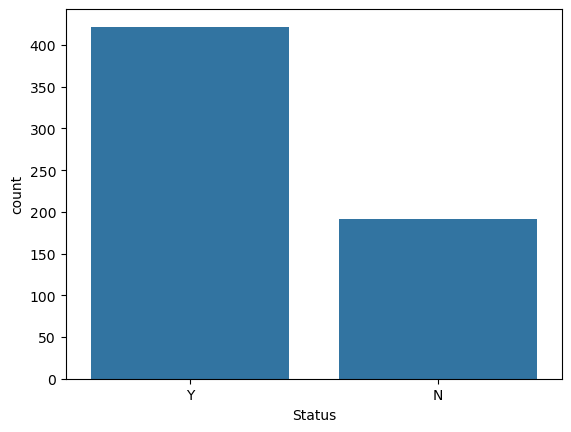

In [6]:
sns.countplot(x=df['Status'])

<AxesSubplot:>

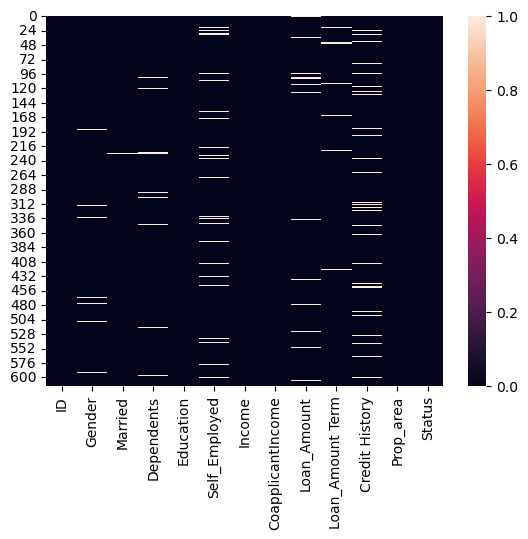

In [7]:
sns.heatmap(df.isna())

<AxesSubplot:xlabel='Loan_Amount Term', ylabel='Density'>

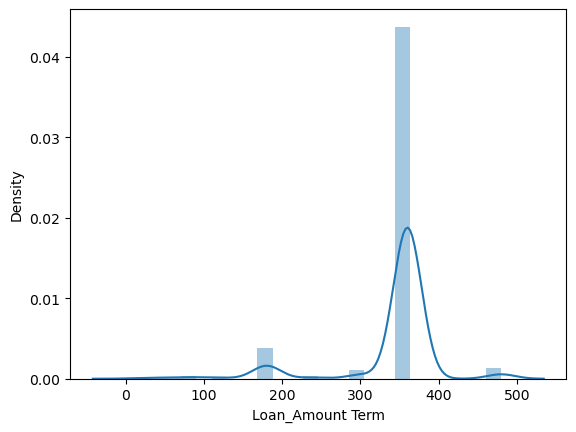

In [8]:
sns.distplot(df['Loan_Amount Term'])

In [9]:
df['Loan_Amount Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount Term, dtype: int64

In [10]:
mode_ter = df['Loan_Amount Term'].mode()[0]
mode_ter

360.0

In [11]:
if pd.isnull(mode_ter):
    df['Loan_Amount Term'].fillna('Unknown', inplace=True)
else:
    df['Loan_Amount Term'].fillna(mode_ter, inplace=True)

<AxesSubplot:xlabel='Loan_Amount', ylabel='Density'>

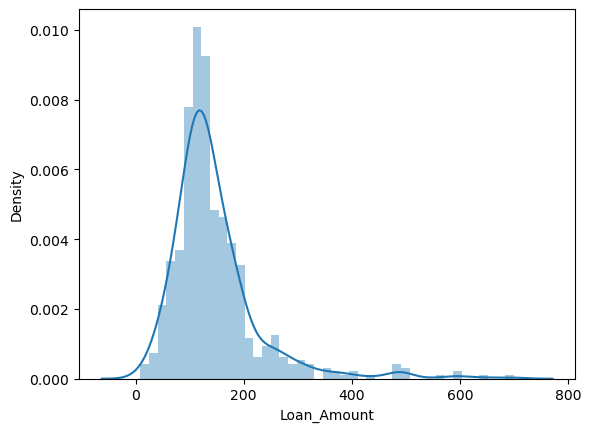

In [12]:
sns.distplot(df['Loan_Amount'])

In [13]:
mean_amount = df['Loan_Amount'].mean()
df['Loan_Amount'].fillna(mean_amount, inplace=True)

In [14]:
df.isna().sum()

ID                    0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Income                0
CoapplicantIncome     0
Loan_Amount           0
Loan_Amount Term      0
Credit History       50
Prop_area             0
Status                0
dtype: int64

<AxesSubplot:xlabel='Credit History', ylabel='Count'>

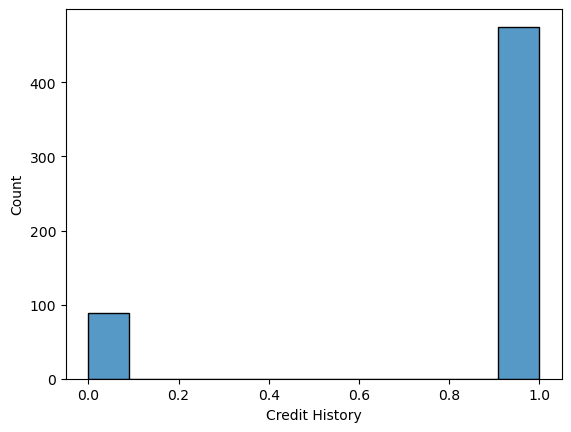

In [15]:
sns.histplot(df['Credit History'])

<AxesSubplot:xlabel='Self_Employed', ylabel='Count'>

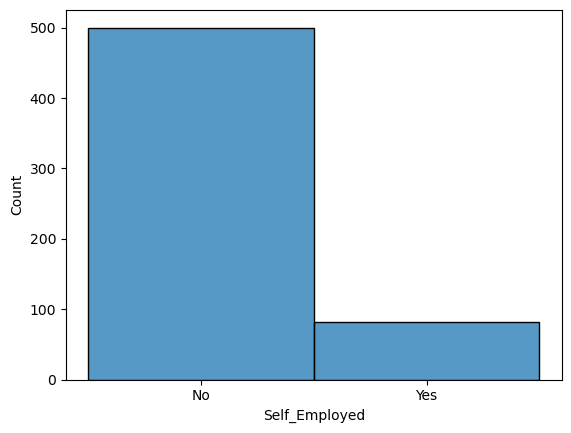

In [16]:
sns.histplot(df['Self_Employed'])

In [17]:
df['Self_Employed'].fillna('Others', inplace=True)

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

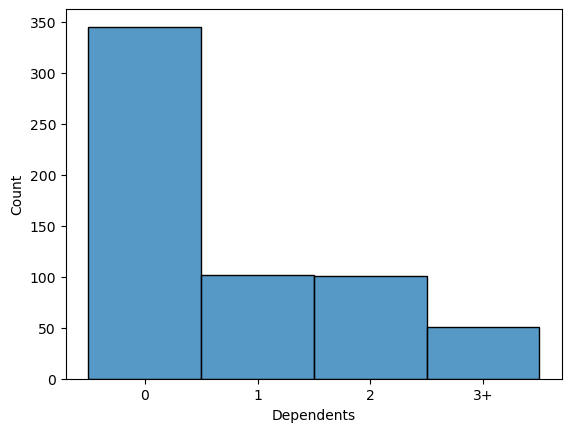

In [18]:
sns.histplot(df['Dependents'])

In [19]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [20]:
mode_dep = df['Dependents'].mode()[0]
df['Dependents'].fillna(mode_dep, inplace=True)

<AxesSubplot:xlabel='Married', ylabel='Count'>

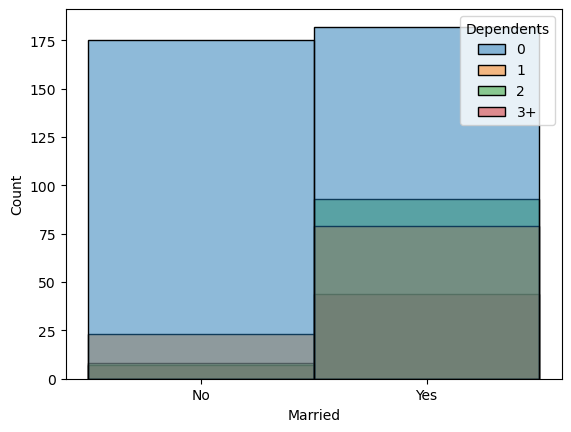

In [21]:
sns.histplot(x='Married',hue='Dependents',data=df)

In [22]:
mode_mar = df['Married'].mode()[0]
df['Married'].fillna(mode_mar, inplace=True)

<AxesSubplot:xlabel='Credit History', ylabel='Density'>

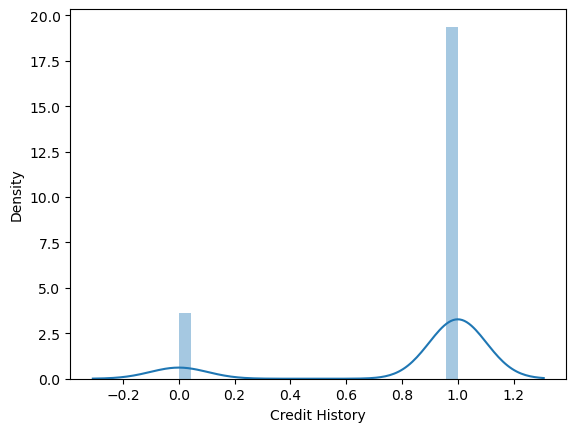

In [23]:
sns.distplot(df['Credit History'])

In [24]:
df['Credit History'].fillna(3,inplace=True)

In [25]:
mode_gen = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gen, inplace=True)

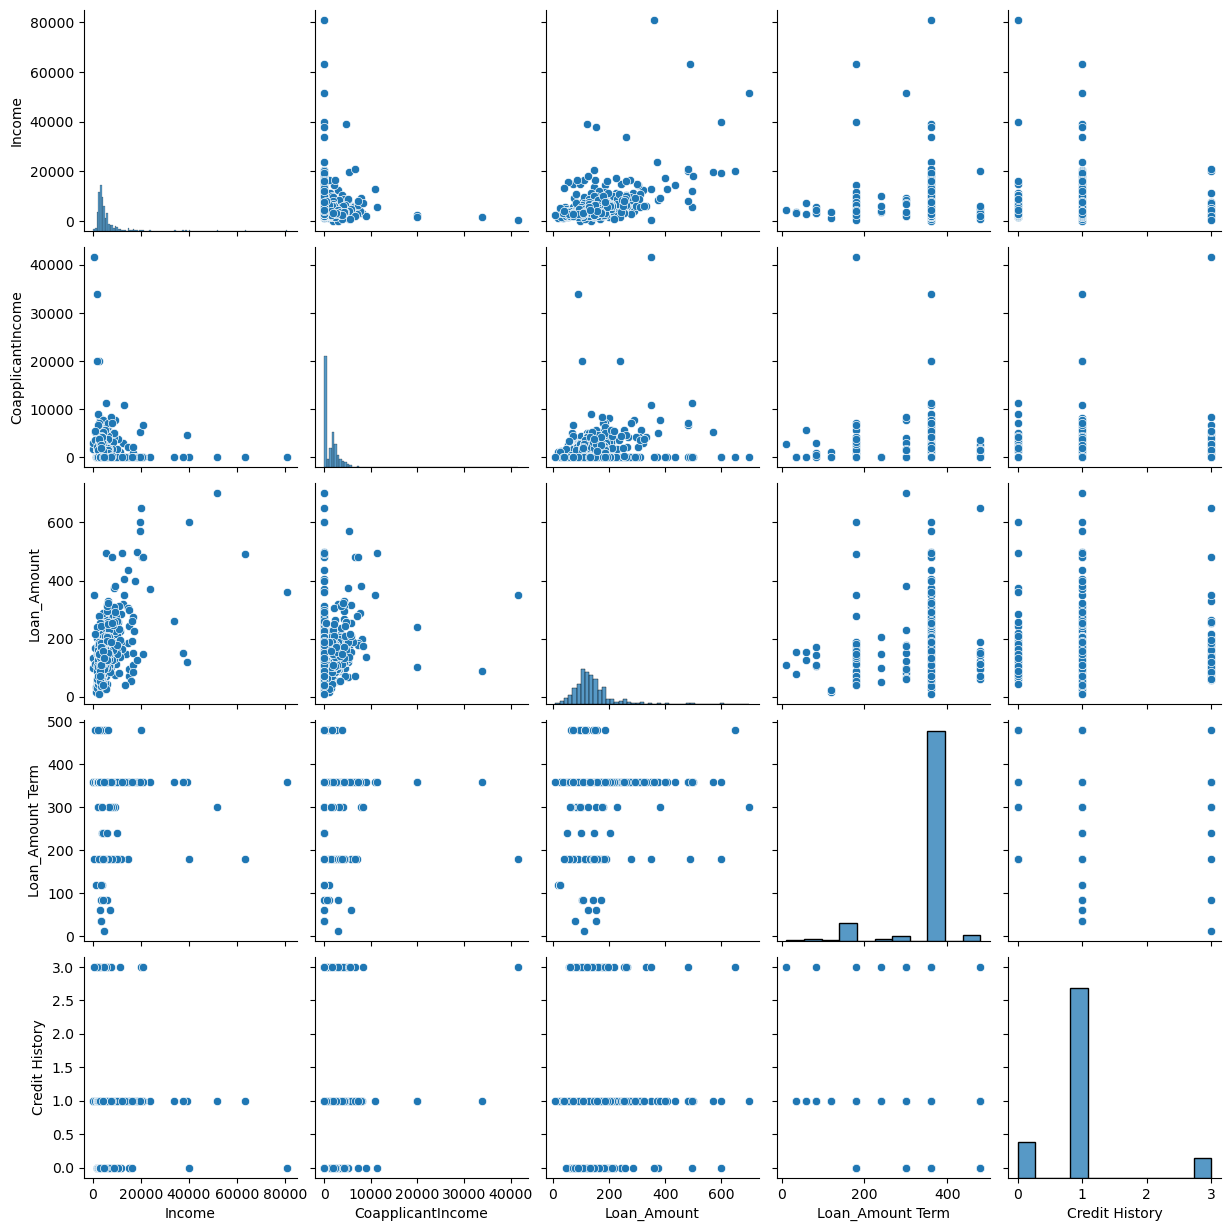

In [26]:
sns.pairplot(df)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   Income             614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        614 non-null    float64
 9   Loan_Amount Term   614 non-null    float64
 10  Credit History     614 non-null    float64
 11  Prop_area          614 non-null    object 
 12  Status             614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
df.drop(['ID'],axis=1,inplace=True)

In [29]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [30]:
df['Dependents'] = df['Dependents'].replace({'0':'Zero','1':'One','2':'Two','3+':'Three'})

In [31]:
df

,Gender,Married,Dependents,Education,Self_Employed,Income,CoapplicantIncome,Loan_Amount,Loan_Amount Term,Credit History,Prop_area,Status
0,Male,No,Zero,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,One,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,Zero,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,Zero,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,Zero,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Zero,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,Three,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,One,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,Two,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [33]:
df

,Gender,Married,Dependents,Education,Self_Employed,Income,CoapplicantIncome,Loan_Amount,Loan_Amount Term,Credit History,Prop_area,Status
0,1,0,3,0,0,376,0,100,8,1,2,1
1,1,1,0,0,0,306,60,81,8,1,0,0
2,1,1,3,0,2,139,0,26,8,1,2,1
3,1,1,3,1,0,90,160,73,8,1,2,1
4,1,0,3,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,3,0,0,125,0,29,8,1,0,1
610,1,1,1,0,0,275,0,7,5,1,0,1
611,1,1,0,0,0,431,3,163,8,1,2,1
612,1,1,2,0,0,422,0,133,8,1,2,1


In [34]:
x_ = df.drop('Status',axis=1)
y_ = df.Status

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x_,y_)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [38]:
lr = LogisticRegression() 
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
rc = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.7921146953405018
--------------------------------------------------
[[114  41]
 [ 17 107]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.87      0.74      0.80       155
           1       0.72      0.86      0.79       124

    accuracy                           0.79       279
   macro avg       0.80      0.80      0.79       279
weighted avg       0.80      0.79      0.79       279

--------------------------------------------------
Score_train: 0.8088495575221238


In [41]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.7706093189964157
--------------------------------------------------
[[114  41]
 [ 23 101]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.83      0.74      0.78       155
           1       0.71      0.81      0.76       124

    accuracy                           0.77       279
   macro avg       0.77      0.78      0.77       279
weighted avg       0.78      0.77      0.77       279

--------------------------------------------------
Score_train: 1.0


In [42]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
y_pred_train = kn.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.6200716845878136
--------------------------------------------------
[[99 56]
 [50 74]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.66      0.64      0.65       155
           1       0.57      0.60      0.58       124

    accuracy                           0.62       279
   macro avg       0.62      0.62      0.62       279
weighted avg       0.62      0.62      0.62       279

--------------------------------------------------
Score_train: 0.7610619469026548


In [43]:
rc.fit(x_train,y_train)
y_pred = rc.predict(x_test)
y_pred_train = rc.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.8207885304659498
--------------------------------------------------
[[120  35]
 [ 15 109]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.89      0.77      0.83       155
           1       0.76      0.88      0.81       124

    accuracy                           0.82       279
   macro avg       0.82      0.83      0.82       279
weighted avg       0.83      0.82      0.82       279

--------------------------------------------------
Score_train: 1.0


In [44]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
y_pred_train = gb.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.7813620071684588
--------------------------------------------------
[[111  44]
 [ 17 107]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.87      0.72      0.78       155
           1       0.71      0.86      0.78       124

    accuracy                           0.78       279
   macro avg       0.79      0.79      0.78       279
weighted avg       0.80      0.78      0.78       279

--------------------------------------------------
Score_train: 0.9168141592920354


In [45]:
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_pred_train = svm.predict(x_train)

print('Score:',accuracy_score(y_test, y_pred))
print('-'*50)
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('Report:',classification_report(y_test, y_pred))
print('-'*50)
print('Score_train:', accuracy_score(y_train, y_pred_train))

Score: 0.4731182795698925
--------------------------------------------------
[[ 28 127]
 [ 20 104]]
--------------------------------------------------
Report:               precision    recall  f1-score   support

           0       0.58      0.18      0.28       155
           1       0.45      0.84      0.59       124

    accuracy                           0.47       279
   macro avg       0.52      0.51      0.43       279
weighted avg       0.52      0.47      0.41       279

--------------------------------------------------
Score_train: 0.584070796460177


In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
lr_score = cross_val_score(lr,x,y,cv=10)
print(lr_score)
print('*'*50)
print('Log reg:',lr_score.mean())

[0.71764706 0.65882353 0.74117647 0.72941176 0.75       0.91666667
 0.85714286 0.78571429 0.83333333 0.86904762]
**************************************************
Log reg: 0.7858963585434173


In [48]:
dt_score = cross_val_score(dt,x,y,cv=10)
print(dt_score)
print('*'*50)
print('Decision Tree:',dt_score.mean())

[0.75294118 0.65882353 0.68235294 0.69411765 0.76190476 0.91666667
 0.85714286 0.73809524 0.83333333 0.79761905]
**************************************************
Decision Tree: 0.7692997198879551


In [49]:
kn_score = cross_val_score(kn,x,y,cv=10)
print(kn_score)
print('*'*50)
print('KNN:',kn_score.mean())

[0.67058824 0.62352941 0.58823529 0.62352941 0.63095238 0.77380952
 0.69047619 0.63095238 0.63095238 0.64285714]
**************************************************
KNN: 0.6505882352941177


In [50]:
gb_score = cross_val_score(gb,x,y,cv=10)
print(gb_score)
print('*'*50)
print('Grad Boost:',gb_score.mean())

[0.72941176 0.68235294 0.75294118 0.70588235 0.79761905 0.89285714
 0.92857143 0.82142857 0.94047619 0.89285714]
**************************************************
Grad Boost: 0.8144397759103642


In [51]:
rc_score = cross_val_score(rc,x,y,cv=10)
print(rc_score)
print('*'*50)
print('Random Forest:',rc_score.mean())

[0.74117647 0.67058824 0.81176471 0.72941176 0.82142857 0.94047619
 0.9047619  0.85714286 0.92857143 0.91666667]
**************************************************
Random Forest: 0.8321988795518207


In [52]:
svm_score = cross_val_score(svm,x,y,cv=10)
print(svm_score)
print('*'*50)
print('SVM',svm_score.mean())

[0.54117647 0.51764706 0.52941176 0.52941176 0.57142857 0.47619048
 0.54761905 0.42857143 0.44047619 0.54761905]
**************************************************
SVM 0.5129551820728291


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20], 'criterion': ['gini', 'entropy'], 'min_samples_split': [10,11],
    'min_samples_leaf': [5,6]}

In [55]:
rf = RandomForestClassifier()
grd = GridSearchCV(estimator=rf, param_grid=params)
grd.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [100, 200, 300]})

In [56]:
best_ext = grd.best_estimator_
best_ext.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=200)

In [57]:
best_ext.score(x_test,y_test)

0.8100358422939068

In [58]:
import pickle
import joblib

model_class = rc

file = 'Global Power plant.pkl'
pickle.dump(model_class, open(file,'wb'))

loaded_model = pickle.load(open('Global Power Plant.pkl','rb'))

Loal Approval Status  
Observations

•	In the overall dataset, there are no duplicated values
•	Columns: 13 and Rows:614
•	The labels are imbalanced
•	Most of the loans have been taken for 360 days
•	The avg. loan amount is 146 and the max. is 700 with a std. deviation of 85
•   Most of the loans were taken by not-self employed people and with no dependents
•   The best model for classification is Random Forest Classifier with 0.8 accuracy score 